In [1]:
import json
import numpy as np
import pandas as pd
import gensim

#import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from num2words import num2words
from pprint import pprint
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
import seaborn as sns

In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/martin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [4]:
parsed_sites = 'abs_dict.json'

print("Started Reading JSON file")
with open(parsed_sites, "r") as read_file:
    abstract_dict = json.load(read_file)
    print("Decoded JSON Data From File")

Started Reading JSON file
Decoded JSON Data From File


In [5]:
abstract_df = pd.DataFrame.from_dict(abs_dict)
abstract_df.head()

,doi,titles,abstracts,authors,keywords,sources
0,10.3390,Community Faecal Management Strategies and Per...,Most people in rural areas in South Africa (SA...,"[Matthew Mamera, Johan J. van Tol, Makhosazana...",agriculture,mdpi
1,10.3390,Adoption of Sustainable Agriculture Practices ...,The aim of this study was to highlight the imp...,"[Rafay Waseem, Gershom Endelani Mwalupaso, Far...",agriculture,mdpi
2,10.3390,Atlanta Residents’ Knowledge Regarding Heavy M...,Urban agriculture and gardening provide many h...,"[Lauren Balotin, Samantha Distler, Antoinette ...",agriculture,mdpi
3,10.3390,Perceptions of the Challenges and Opportunitie...,Waste management has become pertinent in urban...,"[Nqubeko Neville Menyuka, Melusi Sibanda, Urmi...",agriculture,mdpi
4,10.3390,An Assessment of Seaweed Extracts: Innovation ...,Plant growth regulators (PGRs) are described i...,"[El Chami Daniel, Galli Fabio]",agriculture,mdpi


In [26]:
keywords = abstract_df.groupby('keywords').count()
keywords.head(40)

,doi,titles,abstracts,authors,sources
keywords,,,,,
CNN,279,279,279,279,279
agric,21,21,21,21,21
agriculture,227,227,227,227,227
agriculture CNN,215,215,215,215,215
agriculture computer vision,193,193,193,193,193
agriculture deep learning,35,35,35,35,35
agriculture machine learning,230,230,230,230,230
agriculture object recognition,211,211,211,211,211
agronomy,321,321,321,321,321


In [28]:
agri_labels = ["agronomy", "agriculture", "mildew", "wheat", "barley", "agric"]
ML_labels = ["CNN", "computer vision", "deep learning", "image segmantation", "machine learning", "neural networks", "object recognition", "supervised learning", "unsupervised learning"]

abstracts = abstract_dict['abstracts']
agri_abstracts = []
ML_abstracts = []
mix = []
for i in range (len(abstract_dict["abstracts"])):
    if abstract_dict["keywords"][i] in agri_labels:
        agri_abstracts.append(abstract_dict["abstracts"][i])
    elif abstract_dict["keywords"][i] in ML_labels:
        ML_abstracts.append(abstract_dict["abstracts"][i])
    else:
        mix.append(abstract_dict["abstracts"][i])
        



In [30]:



#corpus = developer['abstracts']

# Preprocessing

def convert_lower_case(data):
    return np.char.lower(data)

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

def stemming(data):
    stemmer= PorterStemmer()
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

def lemming(data):
    lemmatizer = WordNetLemmatizer() 
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + lemmatizer.lemmatize(w)
    return new_text

def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text



def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data)
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = lemming(data)
    return data


# Preprocessing
def preprocess_corpus(corpus):
    preprocess_abstract = []
    for abstract in corpus:
        preprocess_abstract.append(word_tokenize(str(preprocess(abstract))))
        #list of lists of strings (words)
    return preprocess_abstract



"""
# Build the bigram and trigram models
# Careful: it might be worth creating th bigrams etc before dtemming and lemming
bigram = gensim.models.Phrases(preprocess_abstract) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[preprocess_abstract], threshold=100)  


# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
"""



def make_bigrams(preprocess_abstract):
    data_processed = []
    bigram = gensim.models.Phrases(preprocess_abstract)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    for abstract in preprocess_abstract:
        data_processed.append(bigram_mod[abstract])
    return data_processed




def build_LDA(corpus):
    preprocess_abstract = preprocess_corpus(corpus)
    bigrams = make_bigrams(preprocess_abstract)

    # Create Dictionary
    id2word = gensim.corpora.Dictionary(bigrams)

    # Create Corpus
    texts = bigrams

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    """
    # View
    print(corpus[:1])
    # Human readable format of corpus (term-frequency)
    print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])
    """


    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=20, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)

    """
    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    """

    # Visualize the topics
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    return vis


build_LDA(agri_abstracts)

<>:9: DeprecationWarning: invalid escape sequence \]
<>:9: DeprecationWarning: invalid escape sequence \]
<>:9: DeprecationWarning: invalid escape sequence \]
<ipython-input-30-c8b90996f96f>:9: DeprecationWarning: invalid escape sequence \]
  symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.358439  0.173607       1        1  24.084656
11    -0.372918  0.079834       2        1  23.830039
14    -0.338412 -0.046940       3        1  21.182258
9     -0.282144 -0.215911       4        1  14.960118
4     -0.105128 -0.182715       5        1   4.912349
7     -0.005441  0.228538       6        1   2.877646
19     0.075286  0.001847       7        1   1.472293
12     0.103683  0.008088       8        1   1.378389
3      0.095552  0.005923       9        1   1.113101
0      0.077132 -0.043652      10        1   1.092461
5      0.106225  0.001882      11        1   0.754751
17     0.112201  0.000478      12        1   0.582599
10     0.112518 -0.000610      13        1   0.432106
18     0.107455 -0.006690      14        1   0.368559
8      0.113101 -0.001608      15        1   0.289032
6      0.113446  0.000275      16        1   0.195462
15     0.111460 -0.000114      17        1   0.163674
16     0.111875 -0.000589      18        1   0.128238
2      0.111593 -0.000752      19        1   0.119676
13     0.110954 -0.000888      20        1   0.062594, topic_info=                Term       Freq       Total Category  logprob  loglift
253     two_thousand  433.00000  433.000000  Default   30.000  30.0000
959               de  282.00000  282.000000  Default   29.000  29.0000
1417           wheat  806.00000  806.000000  Default   28.000  28.0000
2740           grain  564.00000  564.000000  Default   27.000  27.0000
1639            gene  754.00000  754.000000  Default   26.000  26.0000
...              ...        ...         ...      ...      ...      ...
3031   drought_toler    0.00561    0.904521  Topic20   -9.536   2.2934
3584          cereal    0.00561    0.904589  Topic20   -9.536   2.2933
3459         genotyp    0.00561    0.904838  Topic20   -9.536   2.2930
4447          marker    0.00561    0.904608  Topic20   -9.536   2.2933
6281  powderi_mildew    0.00561    0.904780  Topic20   -9.536   2.2931

[897 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
1085      6  0.992678            ,_nine
1848      3  0.992834      abiot_stress
2135     19  0.381769  abstract_excerpt
262       3  0.852036            access
262       4  0.142006            access
...     ...       ...               ...
656       1  0.583016              year
656       2  0.004485              year
656       4  0.412596              year
448       1  0.892250             yield
448       2  0.106611             yield

[979 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 12, 15, 10, 5, 8, 20, 13, 4, 1, 6, 18, 11, 19, 9, 7, 16, 17, 3, 14])

In [31]:
build_LDA(ML_abstracts)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.391556 -0.038570       1        1  51.821784
3      0.369639 -0.026295       2        1  22.249190
15     0.295406  0.202291       3        1   7.303605
18     0.129490 -0.351572       4        1   3.714060
8      0.153006  0.128873       5        1   3.534938
6     -0.040786  0.001016       6        1   2.359622
12    -0.041094  0.023733       7        1   1.644402
16    -0.045406 -0.010897       8        1   1.316305
4     -0.055658 -0.021200       9        1   1.090024
17    -0.088933  0.010259      10        1   0.795833
11    -0.087441  0.002679      11        1   0.729655
13    -0.093901  0.009992      12        1   0.728420
0     -0.101645  0.011224      13        1   0.581447
9     -0.116111  0.009584      14        1   0.516933
10    -0.107272  0.008011      15        1   0.470271
1     -0.108462  0.007054      16        1   0.452922
2     -0.111933  0.010092      17        1   0.394850
14    -0.114607  0.009294      18        1   0.233635
19    -0.113421  0.007460      19        1   0.047607
5     -0.112425  0.006971      20        1   0.014497, topic_info=                Term         Freq        Total Category  logprob  loglift
88             model  2157.000000  2157.000000  Default  30.0000  30.0000
35           network  1768.000000  1768.000000  Default  29.0000  29.0000
29             learn  1218.000000  1218.000000  Default  28.0000  28.0000
724          predict   845.000000   845.000000  Default  27.0000  27.0000
995   neural_network   721.000000   721.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
3188           robot     0.001952     0.835922  Topic20  -9.2067   2.7790
4401           wider     0.001952     0.835862  Topic20  -9.2067   2.7791
2990         attract     0.001952     0.835875  Topic20  -9.2067   2.7791
3185           posit     0.001952     0.835905  Topic20  -9.2067   2.7790
6292      technician     0.001952     0.835856  Topic20  -9.2067   2.7791

[843 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1179      7  0.979749         ,
2684     16  0.876234   ,_eight
1735     15  0.968685    ,_four
356      17  0.823778        5g
2337      2  0.303659  abstract
...     ...       ...       ...
2466     12  0.960398     width
1021      1  0.348865      work
1021      2  0.649348      work
956      16  0.870623  worldwid
2915     14  0.799972    ya_que

[904 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 16, 19, 9, 7, 13, 17, 5, 18, 12, 14, 1, 10, 11, 2, 3, 15, 20, 6])

In [32]:
build_LDA(mix)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.342491 -0.140491       1        1  24.471960
5      0.301416  0.041997       2        1  19.443735
9      0.318326 -0.013180       3        1  16.764870
7      0.257127  0.209931       4        1  13.329419
8      0.255929  0.052907       5        1   9.512053
15     0.204990 -0.028677       6        1   5.842740
10     0.006758  0.128376       7        1   2.472356
17    -0.039711 -0.039146       8        1   2.245129
2      0.024052 -0.322788       9        1   2.203967
3     -0.086603  0.015622      10        1   1.160877
6     -0.144131 -0.004908      11        1   0.668628
16    -0.148428  0.016967      12        1   0.602077
1     -0.154293  0.008541      13        1   0.583832
13    -0.161643  0.015313      14        1   0.332023
12    -0.163379  0.009595      15        1   0.224931
4     -0.164338  0.010356      16        1   0.057324
19    -0.163503  0.010143      17        1   0.047313
18    -0.161925  0.009851      18        1   0.018292
14    -0.161567  0.009795      19        1   0.009305
11    -0.161567  0.009795      20        1   0.009171, topic_info=            Term         Freq        Total Category  logprob  loglift
253         data  1322.000000  1322.000000  Default  30.0000  30.0000
358         crop   735.000000   735.000000  Default  29.0000  29.0000
34          imag  2472.000000  2472.000000  Default  28.0000  28.0000
191       detect  1561.000000  1561.000000  Default  27.0000  27.0000
168          two  1000.000000  1000.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2997          dm     0.001506     0.878951  Topic20  -9.0996   2.9276
2998  error_rmse     0.001506     0.878946  Topic20  -9.0996   2.9276
2999        fibr     0.001506     0.878946  Topic20  -9.0996   2.9276
3000     finland     0.001506     0.878946  Topic20  -9.0996   2.9276
3001       fresh     0.001506     0.878958  Topic20  -9.0996   2.9276

[1026 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1781      8  0.986901      ,
671       8  0.988833     2d
579      13  0.810781  2d_3d
341       6  0.019935     3d
341       8  0.946911     3d
...     ...       ...    ...
1760     14  0.890718   wors
1527      5  0.988412  would
1740     12  0.438117  wrong
743       1  0.996110  yield
1917      2  0.985817   •the

[1082 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 10, 8, 9, 16, 11, 18, 3, 4, 7, 17, 2, 14, 13, 5, 20, 19, 15, 12])

In [41]:


# To use the Mallet LDA you must download this:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip


def mallet_LDA(corpus, num_topics):
    preprocess_abstract = preprocess_corpus(corpus)
    bigrams = make_bigrams(preprocess_abstract)

    # Create Dictionary
    id2word = gensim.corpora.Dictionary(bigrams)

    # Create Corpus
    texts = bigrams

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    mallet_path = 'mallet-2.0.8/bin/mallet' 
    ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)

    # Show Topics
    pprint(ldamallet.show_topics(formatted=False))

    # Compute Coherence Score
    coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=bigrams, dictionary=id2word, coherence='c_v')
    coherence_ldamallet = coherence_model_ldamallet.get_coherence()
    print('\nCoherence Score: ', coherence_ldamallet)
    return ldamallet, coherence_ldamallet

In [34]:
mallet_LDA(mix, 20)

[(4,
  [('analysi', 0.02741413830278762),
   ('studi', 0.0220237178499923),
   ('result', 0.02002156168181118),
   ('obtain', 0.019405513630063143),
   ('spectral', 0.017557369474819035),
   ('stage', 0.017095333436008008),
   ('number', 0.016017249345448945),
   ('characterist', 0.015555213306637918),
   ('base', 0.014631141229015864),
   ('determin', 0.012937009086708763)]),
 (1,
  [('algorithm', 0.07116596638655462),
   ('imag', 0.06998424369747899),
   ('method', 0.03269432773109244),
   ('region', 0.03230042016806723),
   ('base', 0.024422268907563025),
   ('result', 0.01838235294117647),
   ('accuraci', 0.018119747899159665),
   ('extract', 0.01798844537815126),
   ('segment', 0.017463235294117647),
   ('cluster', 0.016544117647058824)]),
 (11,
  [('techniqu', 0.05020196191575303),
   ('perform', 0.03130409694171956),
   ('applic', 0.031159838430467397),
   ('process', 0.024812463935372186),
   ('data', 0.022648586266589728),
   ('comput', 0.02048470859780727),
   ('approach', 0.

0

In [42]:
def compute_coherence_values(corpus, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model, coherencemodel = mallet_LDA(corpus, num_topics)
        model_list.append(model)
        coherence_values.append(coherencemodel)

    return model_list, coherence_values

In [43]:
# Can take a long time to run.
start=8
limit=24
step=2
model_list, coherence_values = compute_coherence_values(corpus=mix, start=start, limit=limit, step=step)

[(0,
  [('model', 0.04652183454026772),
   ('predict', 0.02369980250164582),
   ('data', 0.01892692560895326),
   ('machin_learn', 0.017006802721088437),
   ('yield', 0.014208909370199693),
   ('map', 0.011356155365371955),
   ('estim', 0.010862409479921),
   ('studi', 0.009929778362958086),
   ('result', 0.009436032477507132),
   ('soil', 0.008997147245995173)]),
 (1,
  [('imag', 0.05297422166220402),
   ('network', 0.02703837874730929),
   ('model', 0.026040846327505644),
   ('dataset', 0.02451829684464745),
   ('propos', 0.021368194466320156),
   ('train', 0.020738173990654696),
   ('cnn', 0.02000315010237833),
   ('segment', 0.016800546017745575),
   ('featur', 0.014437969234000104),
   ('convolut_neural', 0.013335433401585552)]),
 (2,
  [('predict', 0.014123926060921634),
   ('model', 0.012626920072897682),
   ('cow', 0.011195001301744337),
   ('highlight', 0.009632908096849779),
   ('improv', 0.009437646446237959),
   ('individu', 0.008461338193178859),
   ('machin_learn', 0.0082


Coherence Score:  0.4389149504028595
[(2,
  [('segment', 0.08836631099140163),
   ('imag', 0.07779964777789289),
   ('network', 0.026934631720708587),
   ('improv', 0.013985289547290997),
   ('effect', 0.013570910597741634),
   ('algorithm', 0.013260126385579612),
   ('propos', 0.012327773749093546),
   ('model', 0.011913394799544183),
   ('label', 0.011188231637832799),
   ('de', 0.010877447425670777)]),
 (9,
  [('product', 0.02370923095438681),
   ('import', 0.02226501384041401),
   ('increas', 0.018173065350824406),
   ('studi', 0.016728848236851605),
   ('control', 0.016127091106029605),
   ('develop', 0.011914791190275605),
   ('activ', 0.011914791190275605),
   ('inform', 0.011433385485618005),
   ('provid', 0.011313034059453605),
   ('signific', 0.010109519797809604)]),
 (5,
  [('imag', 0.07932669952571375),
   ('detect', 0.07774574537338418),
   ('method', 0.042592764809820514),
   ('algorithm', 0.02659722868036827),
   ('region', 0.02417929880033479),
   ('base', 0.0170185064


Coherence Score:  0.438552805317833
[(1,
  [('two_thousand', 0.027794471153846152),
   ('thousand_,', 0.027193509615384616),
   ('one_hundr', 0.024338942307692308),
   ('hundr_and', 0.023737980769230768),
   ('cnn', 0.02283653846153846),
   ('thirti', 0.020282451923076924),
   ('sampl', 0.02013221153846154),
   ('twenti', 0.01953125),
   ('studi', 0.015925480769230768),
   ('differ', 0.014723557692307692)]),
 (0,
  [('system', 0.06873415834203071),
   ('weed', 0.036081705680632174),
   ('base', 0.027583122111227078),
   ('control', 0.026539436409721187),
   ('develop', 0.026539436409721187),
   ('field', 0.025793946622931267),
   ('detect', 0.02385567317727747),
   ('plant', 0.02311018339048755),
   ('automat', 0.014760697778440435),
   ('implement', 0.012971522290144625)]),
 (9,
  [('imag', 0.06030368763557484),
   ('network', 0.051193058568329716),
   ('method', 0.04584237165582068),
   ('improv', 0.024295010845986984),
   ('featur', 0.023282718727404193),
   ('show', 0.021258134490

[<gensim.models.coherencemodel.CoherenceModel object at 0x7f2d3a8eb7b8>, <gensim.models.coherencemodel.CoherenceModel object at 0x7f2d23775978>, <gensim.models.coherencemodel.CoherenceModel object at 0x7f2d1f3c0fd0>, <gensim.models.coherencemodel.CoherenceModel object at 0x7f2d1b34d9b0>, <gensim.models.coherencemodel.CoherenceModel object at 0x7f2d3a8da550>, <gensim.models.coherencemodel.CoherenceModel object at 0x7f2d1e51b048>, <gensim.models.coherencemodel.CoherenceModel object at 0x7f2d1e46fe48>, <gensim.models.coherencemodel.CoherenceModel object at 0x7f2d1efa95f8>]


NotImplementedError: cannot instantiate abstract base class

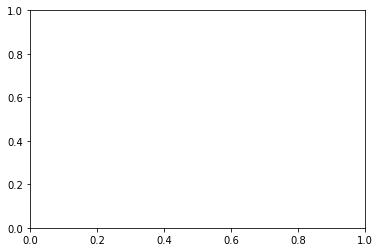

In [45]:
# Show graph
print(coherence_values)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
print(coherence_values)

[0.43157396307582285, 0.46263787110455074, 0.44300858554782263, 0.4471199758451803, 0.42981042058242697, 0.4447975748186329, 0.4373850803489953, 0.4483284603157475, 0.43000401484674317, 0.4284624813494124, 0.4342444364948314, 0.4366804641021528]


In [55]:
optimal_model, coherence = mallet_LDA(corpus=mix, num_topics=24)
print(optimal_model)

[(1,
  [('object', 0.04139668826493881),
   ('region', 0.03869690424766019),
   ('local', 0.029697624190064796),
   ('imag', 0.02591792656587473),
   ('method', 0.022858171346292297),
   ('base', 0.019618430525557954),
   ('field', 0.016918646508279338),
   ('framework', 0.016918646508279338),
   ('requir', 0.015298776097912166),
   ('object_detect', 0.014038876889848811)]),
 (19,
  [('data', 0.08755679832226494),
   ('analysi', 0.019049283467319118),
   ('manag', 0.018874519398811605),
   ('ml', 0.017825934987766516),
   ('farm', 0.01625305837119888),
   ('tool', 0.015554002097168822),
   ('issu', 0.014330653617616217),
   ('farmer', 0.014330653617616217),
   ('integr', 0.013456833275078644),
   ('potenti', 0.013282069206571129)]),
 (3,
  [('imag', 0.06608090792604795),
   ('dataset', 0.06553175910671792),
   ('agricultur', 0.04356580633351638),
   ('challeng', 0.039721764598206116),
   ('perform', 0.03551162365000915),
   ('task', 0.03038623466959546),
   ('visual', 0.019586307889438

In [64]:
corpus = mix
preprocess_abstract = preprocess_corpus(corpus)
bigrams = make_bigrams(preprocess_abstract)

# Create Dictionary
id2word = gensim.corpora.Dictionary(bigrams)

# Create Corpus
texts = bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
mallet_path = 'mallet-2.0.8/bin/mallet' 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=24, id2word=id2word)


def format_topics_sentences(ldamodel, corpus, texts = bigrams):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)



,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.4835,"segment, imag, algorithm, propos, base, label,...","[due, le, deviat, imag, system, nois, imag, ma..."
1,1,20.0,0.3363,"approach, method, result, differ, base, stage,...","[segment, crucial, phase, imag, process, simpl..."
2,2,1.0,0.3172,"object, region, local, imag, method, base, fie...","[paper_present, segment, algorithm, detect, lo..."
3,3,21.0,0.4766,"imag, featur, network, inform, de, improv, net...","[paper_propos, 3d_medgan, mlu_net, info_max, n..."
4,4,6.0,0.2728,"segment, imag, algorithm, propos, base, label,...","[recent_year, import, semant_segment, wide, re..."
5,5,6.0,0.6048,"segment, imag, algorithm, propos, base, label,...","[emerg, 4d, heart_imag, make, data, volum, ima..."
6,6,6.0,0.3537,"segment, imag, algorithm, propos, base, label,...","[unsupervis, segment, essenti, pre_process, te..."
7,7,19.0,0.1324,"data, analysi, manag, ml, farm, tool, issu, fa...","[net, imag, segment, techniqu, develop, primar..."
8,8,9.0,0.3339,"experi, comput, network, propos, due, effici, ...","[paper_propos, novel, probabilist, framework, ..."
9,9,6.0,0.4330,"segment, imag, algorithm, propos, base, label,...","[imag, process, comput_vision, imag, segment, ..."


In [66]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

    
Document_No = list(sent_topics_sorteddf_mallet.index)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

#keep Document_No
sent_topics_sorteddf_mallet["Document_No"] = Document_No

# Show
sent_topics_sorteddf_mallet.head(40)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Document_No
0,0.0,0.5093,"product, level, test, work, harvest, studi, im...","[andrographolid, ag, encapsul, human, albumin,...",881
1,1.0,0.5156,"object, region, local, imag, method, base, fie...","[applic, digit, agricultur, servic, often, req...",422
2,2.0,0.5869,"detect, method, propos_method, propos, leav, t...","[fast_accur, detect, ripe_tomato, plant, repla...",646
3,3.0,0.7053,"imag, dataset, agricultur, challeng, perform, ...","[success, deep_learn, visual, recognit, task, ...",438
4,4.0,0.4488,"map, data, crop, remot_sen, area, classif, lan...","[map, high_resolut, thirti, better, cropland_e...",261
5,5.0,0.5178,"base, algorithm, monitor, behavior, identifi, ...","[simpl, summari, requir, dairi, product, incre...",1149
6,6.0,0.6114,"segment, imag, algorithm, propos, base, label,...","[emerg, 4d, heart_imag, make, data, volum, ima...",21
7,7.0,0.4533,"agricultur, applic, technolog, develop, resear...","[rapid, growth, urban, popul, worldwid, impos,...",426
8,8.0,0.6472,"estim, perform, techniqu, base, process, data,...","[hyperspectr_imag, hsi, power, technolog, alre...",188
9,9.0,0.5406,"experi, comput, network, propos, due, effici, ...","[high, perform, comput, hpc, applic, essenti, ...",129


In [67]:
for i in range (24):
    print(mix[sent_topics_sorteddf_mallet["Document_No"][i]])

Andrographolide (AG) was encapsulated in human albumin nanoparticles (AG NPs), and their crossing properties of the blood-brain barrier (BBB), brain distribution, and effects in TgCRND8 mice were evaluated. The development of appropriate NP formulations is mandatory because of the scarce BBB permeability properties of AG. Developed NPs had proper size (mean size: 159.2 ± 4.5 nm), size distribution (PDI nearby 0.12 ± 0.01), and ζ potential (-24.8 ± 1.2 mV), which were not affected by sodium fluorescein (NAF) loading. When AG was loaded to NPs, it slightly affected their size (210.4 ± 3.2 nm) and ζ potential (-20.3 ± 1.5) but not the PDI. Both NAF and AG had a remarkable encapsulation efficiency (more than 99%). The in vitro release of AG from the NPs reached the highest percentage (48%) after 24 h, and the Higuchi’s equation was found to be the best fitting model (R2 = 0.9635). Both AG and AG NPs did not alter the viability of N2a murine neuroblastoma cells when compared with the untrea